In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=72, freq='M')
passenger_data = np.random.randint(200, 600, size=len(dates))

In [25]:
df = pd.DataFrame({'Month': dates, '#Passengers': passenger_data})
df.set_index('Month', inplace=True)

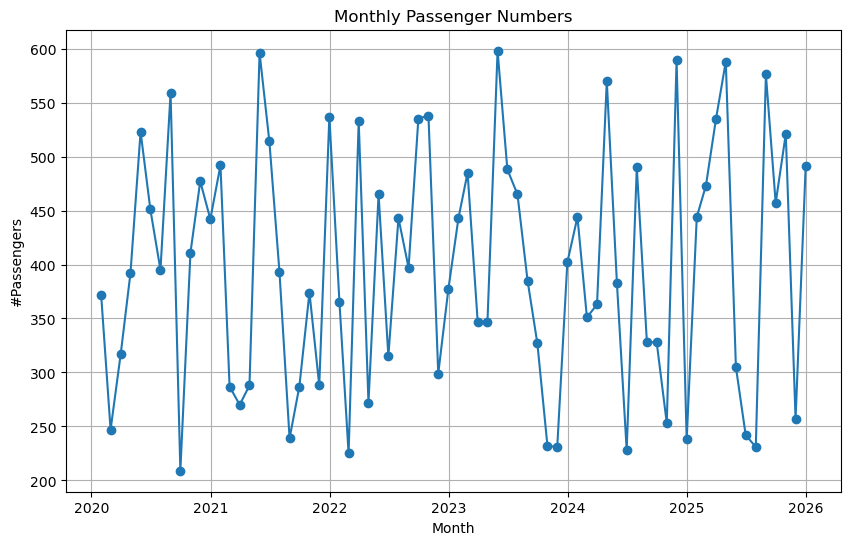

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df, marker='o')
plt.title('Monthly Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.grid(True)
plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    if result[1] <= 0.05:
        print("Reject null hypothesis - Data is stationary")
    else:
        print("Fail to reject null hypothesis - Data is non-stationary")

In [29]:
def plot_acf_pacf(timeseries, lags=20):
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(timeseries, ax=ax[0], lags=lags)
    plot_pacf(timeseries, ax=ax[1], lags=lags)
    plt.show()

In [30]:
check_stationarity(df['#Passengers'])

ADF Statistic: -6.721258040705956
p-value: 3.478420163375526e-09
Critical Values:
	1%: -3.528889992207215
	5%: -2.9044395987933362
	10%: -2.589655654274312
Reject null hypothesis - Data is stationary


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


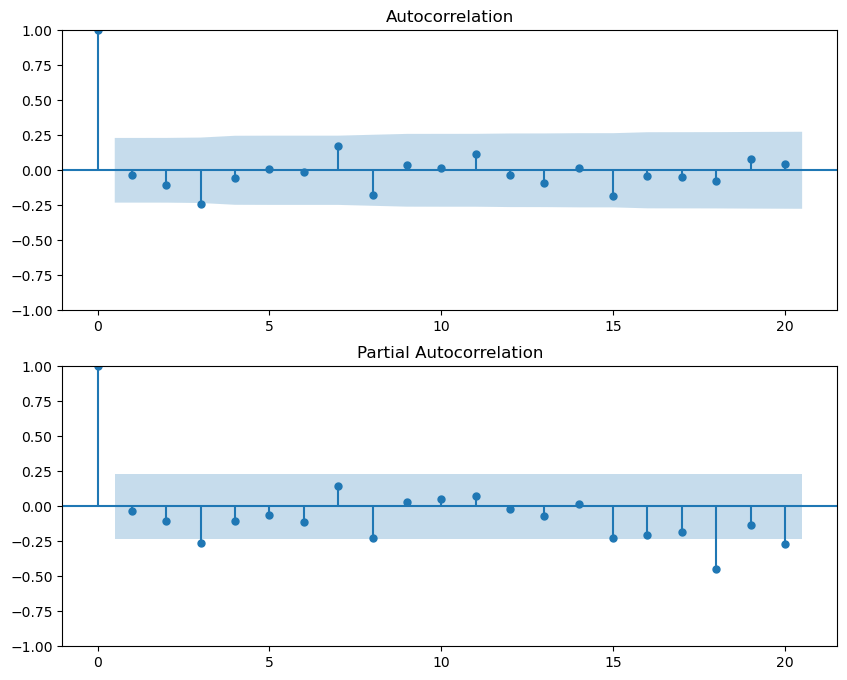

In [31]:
plot_acf_pacf(df['#Passengers'])

In [32]:
df_diff = df.diff().dropna()

In [33]:
check_stationarity(df_diff['#Passengers'])


ADF Statistic: -5.039521962080805
p-value: 1.8524691387208655e-05
Critical Values:
	1%: -3.542412746661615
	5%: -2.910236235808284
	10%: -2.5927445767266866
Reject null hypothesis - Data is stationary


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


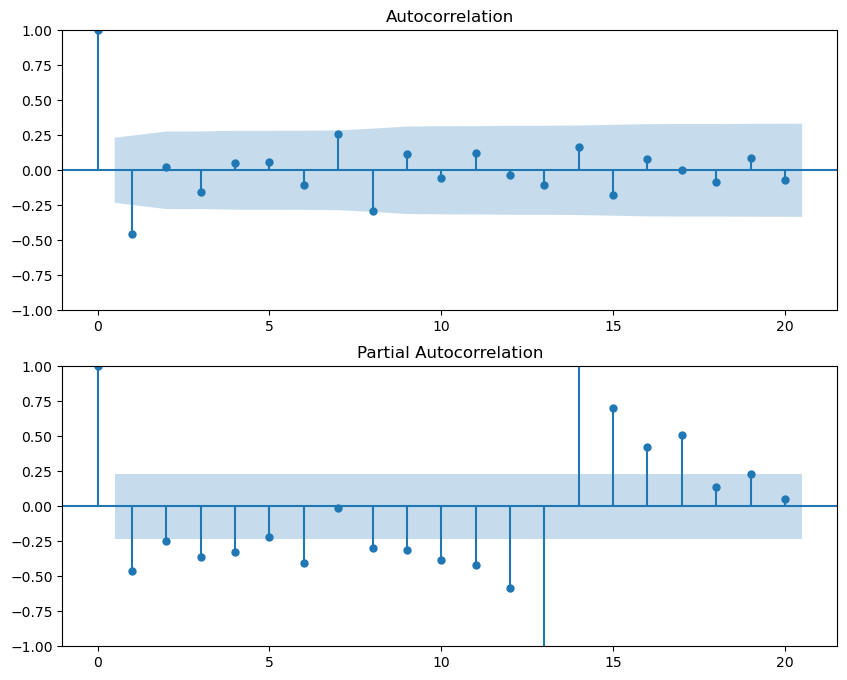

In [34]:
plot_acf_pacf(df_diff['#Passengers'])

In [35]:
model = ARIMA(df['#Passengers'], order=(1,1,1))
results = model.fit()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [36]:
forecast = results.forecast(steps=6)
print("Forecasted values for the next 10 months:")
print(forecast)

Forecasted values for the next 10 months:
2026-01-31    394.713981
2026-02-28    396.601790
2026-03-31    396.564777
2026-04-30    396.565503
2026-05-31    396.565488
2026-06-30    396.565489
Freq: M, Name: predicted_mean, dtype: float64


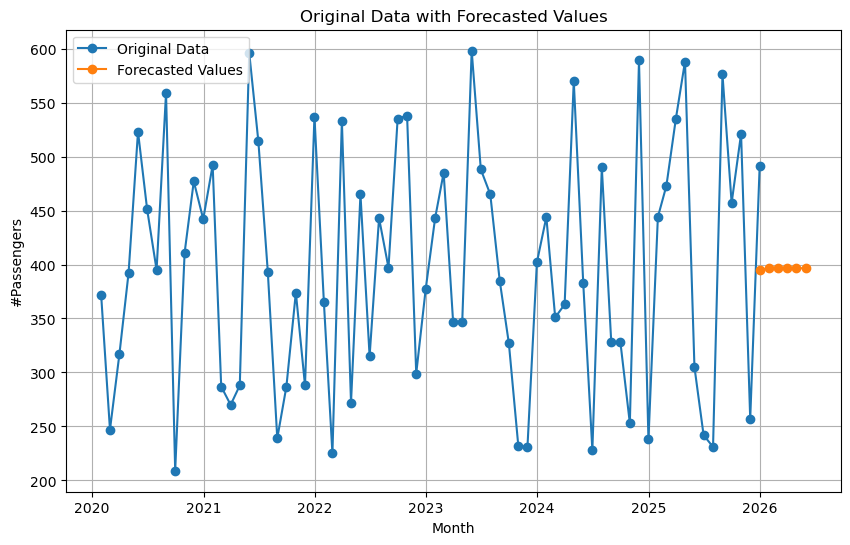

In [37]:
# Plot original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Original Data', marker='o')
plt.plot(pd.date_range(start=df.index[-1], periods=6, freq='M'), forecast, label='Forecasted Values', marker='o')
plt.title('Original Data with Forecasted Values')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.grid(True)
plt.show()